In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
# Read the file provided
gc = pd.read_csv('german_credit.csv')
gc.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
gc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [4]:
gc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [5]:
# Dimension of data
print("Dimension of data:", gc.shape)

# Dimension of dataframe
print("Dimension of dataframe:", gc.ndim)

Dimension of data: (1000, 21)
Dimension of dataframe: 2


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
# Assuming , we will be using 50% data only for this question.
from sklearn.model_selection import train_test_split
gc_h1, gc_h2 = train_test_split(gc, test_size=0.5, random_state = 5)
gc_h1.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
34,0,>= 200 DM / salary assignments for at least 1 ...,12,existing credits paid back duly till now,radio/television,1474,... < 100 DM,... < 1 year,4,female : divorced/separated/married,...,1,if not A121 : building society savings agreeme...,33,bank,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
552,1,< 0 DM,48,existing credits paid back duly till now,domestic appliances,6999,... < 100 DM,4 <= ... < 7 years,1,male : married/widowed,...,1,real estate,34,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
170,1,< 0 DM,15,no credits taken/ all credits paid back duly,car (new),950,... < 100 DM,.. >= 7 years,4,male : single,...,3,"if not A121/A122 : car or other, not in attrib...",33,none,rent,2,skilled employee / official,2,none,yes
466,1,< 0 DM,24,delay in paying off in the past,domestic appliances,1659,... < 100 DM,... < 1 year,4,female : divorced/separated/married,...,2,"if not A121/A122 : car or other, not in attrib...",29,none,rent,1,unskilled - resident,1,"yes, registered under the customers name",yes
713,0,< 0 DM,9,critical account/ other credits existing (not ...,domestic appliances,1138,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,real estate,25,none,own,2,unskilled - resident,1,none,yes


In [7]:
gc_h1.shape

(500, 21)

In [8]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [32]:
object_list = list(gc.select_dtypes(include ='object').columns)
gc_h1 = pd.get_dummies(gc, columns=object_list)

In [45]:
gc_h1.shape
gc_h1.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [34]:
# Getting the correlation
gc_h1.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


In [35]:
object_list

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

### Drop the original variables which are converted to dummy

In [37]:
gc_h1.columns
# Original columns are already deleted from the list while converting them in dummy.

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [38]:
# Splitting the dataframe into training and test set in the ratio of 70:30 
Y = gc_h1['default']
X = gc_h1.drop(['default'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 9)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
model = RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score, precision_score, classification_report, auc
print('Accuracy Score is: ', accuracy_score(Y_test, Y_pred))
print('Confusion Matrix is: ', confusion_matrix(Y_test, Y_pred))

Accuracy Score is:  0.76
Confusion Matrix is:  [[201  17]
 [ 55  27]]


### Q6 Show the list of the features importance( 1 Marks)

In [41]:
print(model.feature_importances_)

[0.07436979 0.09975912 0.03357398 0.03328489 0.07627784 0.01966175
 0.01307346 0.01878579 0.03337534 0.00852894 0.05416797 0.00920299
 0.02210745 0.00985679 0.01306414 0.01103436 0.00777915 0.00912954
 0.01648077 0.00956911 0.01541749 0.00496304 0.00225412 0.0135366
 0.00233655 0.00121127 0.0051289  0.0179419  0.00915225 0.00523646
 0.0125691  0.01328893 0.01467923 0.01447418 0.01429152 0.00866356
 0.0148982  0.00623896 0.00815366 0.01553524 0.00616589 0.00918625
 0.01007184 0.01433916 0.01515022 0.01542632 0.00981993 0.01464779
 0.01618024 0.00579978 0.00700486 0.01299842 0.01040993 0.01173733
 0.01591082 0.0028692  0.0127397  0.01444728 0.01383507 0.00391031
 0.0042953 ]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [43]:
# Use below values
num_folds = 10
seed = 77

In [44]:
#Validate the Random Forest model build above using k fold
# Applying K-Fold for complete dataset(X and Y)

models = []
models.append(('RF', RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999)))


# evaluate  model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(cv_results)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

[0.86 0.71 0.76 0.79 0.8  0.67 0.74 0.8  0.76 0.76]
RF: 0.765000 (0.049850)


In [46]:
#Calculate Mean score
np.mean(results)

0.765

In [47]:
# Calculate score standard deviation using std()
np.std(results)

0.049849774322458074

# Q8 Print the confusion matrix( 1 Marks)

In [48]:
# KFold Cross validation was done on complete set. 
# Here we will be predicting the Y for the complete dataset, rather than train or test split.
y_predict = cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X, Y, cv=10)
print(confusion_matrix(Y, y_predict))

[[653  47]
 [185 115]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [49]:
print('Accuracy Score is: ',accuracy_score(Y, y_predict))
print('Precision Score is: ',precision_score(Y, y_predict))
print('\nClassification Report is:') 
print(classification_report(Y, y_predict))

Accuracy Score is:  0.768
Precision Score is:  0.7098765432098766

Classification Report is:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       700
           1       0.71      0.38      0.50       300

   micro avg       0.77      0.77      0.77      1000
   macro avg       0.74      0.66      0.67      1000
weighted avg       0.76      0.77      0.74      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [25]:
#Hint: Use roc_curve

In [50]:
fpr, tpr, thresholds = roc_curve(Y, y_predict)
print(fpr, tpr, thresholds)

[0.         0.06714286 1.        ] [0.         0.38333333 1.        ] [2 1 0]


No handles with labels found to put in legend.


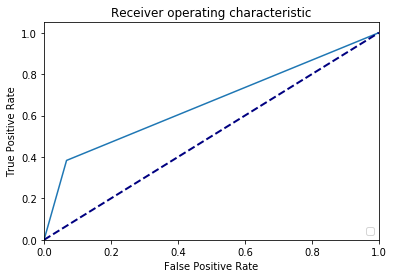

In [51]:
# Plotting the curve for  ROC Curve
lw =2
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [52]:
print(roc_auc_score(Y, y_predict))


0.6580952380952381


In [53]:
print(auc(fpr, tpr))

0.6580952380952381


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [30]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [31]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, Y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, Y_test)
    accuracy.append(acc)

NameError: name 'rfm' is not defined

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())